In [2]:
# Author: Antti Kiviaho
# Date 1.10.2024

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums, spearmanr
from matplotlib import pyplot as plt

import os
os.chdir('/lustre/scratch/kiviaho/prostate_spatial/')


## Data downloads

In [3]:
# Download the data
dat = pd.read_csv('./data/multiplex_ihc_qupath_classifier_cellcounts_20240925.csv',sep=';',header=0)

# Remove dash from Image ID
dat['Image'] = [c.replace('-','') for c in dat['Image']]
dat['Image'] = [c.replace('.tif','') for c in dat['Image']]
dat.index = dat['Image']

# Add a sample identifier
dat['Sample'] = [s.split('_')[0].replace('m','') for s in dat['Image']]

# QuPath outputs zeros as NaN
dat = dat.fillna(0)

# Load the ROI club-like positive / negative annotations
roi_club_annot = pd.read_excel('./data/ROIs_club_annotation_info.xlsx')
roi_club_annot = roi_club_annot.set_index('ROI_id')
roi_club_annot_sorted = roi_club_annot.loc[dat['Image']]


## Raw cell count-based plotting

### Club-like cells & PMN-MDSCs correlation plot (Figure 4h)

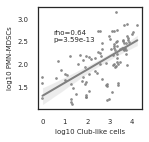

In [ ]:
plot_data = dat.copy()

# Add the 'club-like status' annotation
plot_data = plot_data.loc[roi_club_annot_sorted.index]
plot_data['Club-like status'] = pd.Categorical(roi_club_annot_sorted['club_status'].replace({'club_neg':'Club-like negative','club_pos':'Club-like positive'}),categories=['Club-like negative','Club-like positive'])

plot_data['Num Club like cells_log'] = np.log10(plot_data['Num Club like cells'] + 1)
plot_data['Num MDSCs_log'] = np.log10(plot_data['Num MDSCs'] + 1)

c1 = 'Num Club like cells'
c2 = 'Num MDSCs'

sns.set_theme(style='white',palette=sns.color_palette(['lightgray','#ffd92f']),font_scale=0.63)
fig, ax = plt.subplots(figsize=(2.1, 2.0))

sns.regplot(
    plot_data,
    x='Num Club like cells_log',
    y='Num MDSCs_log',
    color='gray',
    ci=95,
    ax=ax,
    line_kws={'linewidth':2},
    scatter_kws={'s':3}
)


plot_data_no_nans = plot_data[['Num Club like cells','Num MDSCs']].dropna()
rho, pval = spearmanr(plot_data_no_nans['Num Club like cells'],plot_data_no_nans['Num MDSCs'])

plt.text(0.5, 2.5, f'rho={rho:.2f}\np={pval:.2e}', ha='left',fontsize=7,fontweight='normal')

ax.set_xlabel('log10 Club-like cells',fontsize=7)
ax.set_ylabel('log10 PMN-MDSCs',fontsize=7)

plt.tight_layout()

# Save plot
#plt.savefig('./plots/multiplex_ihc/club_like_cells_MDSCs_cellcount_correlation.pdf')

# Show plot
plt.show()

### Total number of cells (Supplementary Figure S7b)

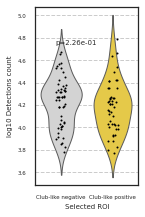

In [13]:
y_var = 'Num Detections'

# Match the data and the annotation indices and concat
plot_data = dat.copy()
plot_data = plot_data.loc[roi_club_annot_sorted.index]

# Attach the ROI labels
plot_data['Club-like status'] = pd.Categorical(roi_club_annot_sorted['club_status'].replace({'club_neg':'Club-like negative','club_pos':'Club-like positive'}),categories=['Club-like negative','Club-like positive'])

# Log-transform
plot_data[y_var] = np.log10(plot_data[y_var] + 1)


sns.set_theme(style='white',palette=sns.color_palette(['lightgray','#ffd92f']),font_scale=0.5)
fig,ax = plt.subplots(figsize=(2,3))

plt.grid(True, which='both', linestyle='--', axis='y', linewidth=1)

sns.stripplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    color='black',
    s=2,
    ax=ax,
)

sns.violinplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    linewidth=1,
    inner=None,
    ax=ax
)


# Perform Wilcoxon rank-sum test
group_yes = plot_data[plot_data['Club-like status'] == 'Club-like positive'][y_var]
group_no = plot_data[plot_data['Club-like status'] == 'Club-like negative'][y_var]
stat, p_value = ranksums(group_yes, group_no)


# Annotate p-value on the plot
plt.text(0.3, plot_data[y_var].max()-0.01*plot_data[y_var].max(), f'p={p_value:.2e}', ha='center',fontsize=7,fontweight='normal')

ylab = y_var.replace('Num ','')
ax.set_xlabel('Selected ROI',fontsize=7)
ax.set_ylabel(f'log10 {ylab} count',fontsize=7)

plt.tight_layout()
# Save the plot
ylab = ylab.replace(' ','')
#plt.savefig(f'./plots/multiplex_ihc/club_status_defined_in_ROI_selection_vs_{ylab}_violinplot_logscale.pdf')

# Show the plot
plt.show()

### Number of club-like cells  (Supplementary Figure S7c)

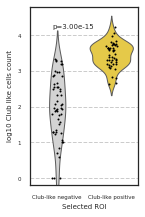

In [17]:
y_var = 'Num Club like cells'

# Match the data and the annotation indices and concat
plot_data = dat.copy()
plot_data = plot_data.loc[roi_club_annot_sorted.index]

# Attach the ROI labels
plot_data['Club-like status'] = pd.Categorical(roi_club_annot_sorted['club_status'].replace({'club_neg':'Club-like negative','club_pos':'Club-like positive'}),categories=['Club-like negative','Club-like positive'])

# Log-transform
plot_data[y_var] = np.log10(plot_data[y_var] + 1)


sns.set_theme(style='white',palette=sns.color_palette(['lightgray','#ffd92f']),font_scale=0.5)
fig,ax = plt.subplots(figsize=(2,3))

plt.grid(True, which='both', linestyle='--', axis='y', linewidth=1)

sns.stripplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    color='black',
    s=2,
    ax=ax,
)

sns.violinplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    linewidth=1,
    inner=None,
    ax=ax
)


# Perform Wilcoxon rank-sum test
group_yes = plot_data[plot_data['Club-like status'] == 'Club-like positive'][y_var]
group_no = plot_data[plot_data['Club-like status'] == 'Club-like negative'][y_var]
stat, p_value = ranksums(group_yes, group_no)


# Annotate p-value on the plot
plt.text(0.3, plot_data[y_var].max()-0.01*plot_data[y_var].max(), f'p={p_value:.2e}', ha='center',fontsize=7,fontweight='normal')

ylab = y_var.replace('Num ','')
ax.set_xlabel('Selected ROI',fontsize=7)
ax.set_ylabel(f'log10 {ylab} count',fontsize=7)
ax.set_ylim(-0.2,4.8) 

plt.tight_layout()

# Save the plot
ylab = ylab.replace(' ','')
#plt.savefig(f'./plots/multiplex_ihc/club_status_defined_in_ROI_selection_vs_{ylab}_violinplot_logscale.pdf')

# Show the plot
plt.show()

## Use cell count normalized data (Pct of cells in ROI)

### Pct MDSCs violinplot (Figure 4i)

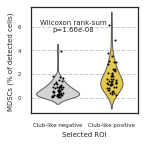

In [19]:
y_var = 'Pct MDSCs'

# Match the data and the annotation indices and concat
plot_data = dat_cellcounts.copy()
plot_data = plot_data.loc[roi_club_annot_sorted.index]

plot_data['Club-like status'] = pd.Categorical(roi_club_annot_sorted['club_status'].replace({'club_neg':'Club-like negative','club_pos':'Club-like positive'}),categories=['Club-like negative','Club-like positive'])


sns.set_theme(style='white',palette=sns.color_palette(['lightgray','#ffd92f']),font_scale=0.5)

fig,ax = plt.subplots(figsize=(2,2))

plt.grid(True, which='both', linestyle='--', axis='y', linewidth=1)

sns.stripplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    color='black',
    s=2,
    ax=ax,
)

sns.violinplot(
    plot_data,
    x='Club-like status',
    y=y_var,
    linewidth=1,
    inner=None,
    ax=ax
)


# Perform Wilcoxon rank-sum test
group_yes = plot_data[plot_data['Club-like status'] == 'Club-like positive'][y_var].dropna()
group_no = plot_data[plot_data['Club-like status'] == 'Club-like negative'][y_var].dropna()
stat, p_value = ranksums(group_yes, group_no)


# Annotate p-value on the plot
plt.text(0.3, (plot_data[y_var].max()-0.1*plot_data[y_var].max()), f'Wilcoxon rank-sum\np={p_value:.2e}', ha='center',fontsize=7,fontweight='normal')

ylab = y_var.replace('Pct ','')
ax.set_xlabel('Selected ROI',fontsize=7)
ax.set_ylabel(f'{ylab} (% of detected cells) ',fontsize=7)

plt.tight_layout()
# Save the plot
#plt.savefig(f'./plots/multiplex_ihc/club_status_defined_in_ROI_selection_vs_{ylab}_violinplot.pdf')

# Show the plot
plt.show()